In [23]:
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Input, MaxPool2D, Add, ReLU, AveragePooling2D, Activation, ZeroPadding2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [24]:
INPUT_SHAPE = (224, 224, 3)
BATCH_SIZE = 32
NUM_CLASSES = 2
input = Input(shape=INPUT_SHAPE)

In [25]:
def identity_block(X, f, filters):
    f1, f2, f3 = filters
    X_shortcut = X
    X = Conv2D(f1, kernel_size=(1, 1), strides=(1, 1), padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    X = Conv2D(f2, kernel_size=(f, f), strides=(1, 1), padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    X = Conv2D(f3, kernel_size=(1, 1), strides=(1, 1), padding='valid')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    return X

In [26]:
def conv_block(X, f, filters,s):
    f1, f2, f3 = filters
    X_shortcut = X

    X = Conv2D(f1, kernel_size=(1, 1), strides=(s, s), padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    X = Conv2D(f2, kernel_size=(f, f), strides=(1, 1), padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    X = Conv2D(f3, kernel_size=(1, 1), strides=(1, 1), padding='same')(X)
    X = BatchNormalization()(X)

    X_shortcut = Conv2D(f3, kernel_size=(1, 1), strides=(s, s), padding="same")(X_shortcut)
    X_shortcut = BatchNormalization()(X_shortcut)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    return X

In [27]:
def resnet50(input):
    X = ZeroPadding2D((3, 3))(input)  # add 3 cols and rows
    # STAGE 1
    X = Conv2D(64, (7, 7), strides=(2, 2))(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    X = MaxPool2D((3, 3), strides=(2, 2))(X)
    # STAGE 2
    X = conv_block(X, 3, [64, 64, 256], 1)
    X = identity_block(X, 3, [64, 64, 256])
    X = identity_block(X, 3, [64, 64, 256])

    # STAGE 3
    X = conv_block(X, 3, [128, 128, 512], 2)
    X = identity_block(X, 3, [128, 128, 512])
    X = identity_block(X, 3, [128, 128, 512])
    X = identity_block(X, 3, [128, 128, 512])

    # STAGE 4
    X = conv_block(X, 3, [256, 256, 1024], 2)
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])

    # STAGE 5
    X = conv_block(X, 3, [512, 512, 2048], 2)
    X = identity_block(X, 3, [512, 512, 2048])
    X = identity_block(X, 3, [512, 512, 2048])

    X = AveragePooling2D(pool_size=(2,2),padding="same")(X)

    model = Model(inputs = input , outputs = X , name='ResNet50')
    return model

In [28]:
model = resnet50(input)

In [29]:
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_4 (ZeroPadd  (None, 230, 230, 3)          0         ['input_3[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv2d_206 (Conv2D)         (None, 112, 112, 64)         9472      ['zero_padding2d_4[0][0]']    
                                                                                                  
 batch_normalization_206 (B  (None, 112, 112, 64)         256       ['conv2d_206[0][0]']   

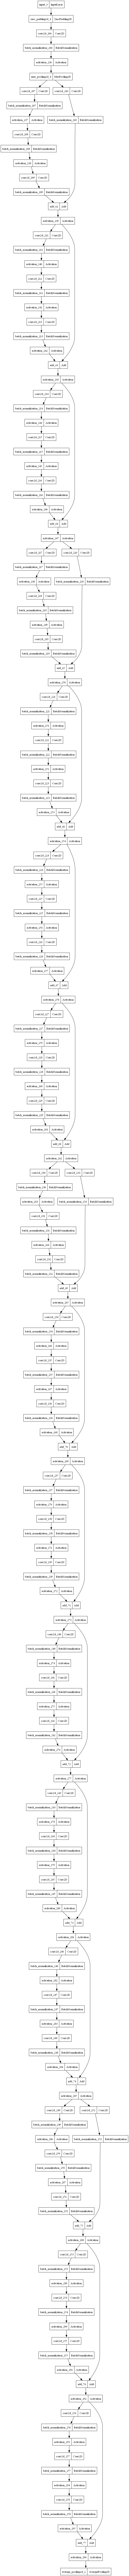

In [30]:
plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False
)